In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.api as sm

#prophet library
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation
#date libraries
from dateutil import parser
from datetime import datetime, timedelta, date
import holidays
%matplotlib inline

In [2]:
df = pd.read_csv("DataSets/Real_Estate_Sales.csv")

df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_32412\1376581043.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("DataSets/Real_Estate_Sales.csv")


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054159 entries, 0 to 1054158
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1054159 non-null  int64  
 1   List Year         1054159 non-null  int64  
 2   Date Recorded     1054157 non-null  object 
 3   Town              1054159 non-null  object 
 4   Address           1054108 non-null  object 
 5   Assessed Value    1054159 non-null  float64
 6   Sale Amount       1054159 non-null  float64
 7   Sales Ratio       1054159 non-null  float64
 8   Property Type     671713 non-null   object 
 9   Residential Type  660275 non-null   object 
 10  Non Use Code      302242 non-null   object 
 11  Assessor Remarks  161472 non-null   object 
 12  OPM remarks       11564 non-null    object 
 13  Location          254643 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 112.6+ MB


In [4]:
# remove special character 
df.columns = df.columns.str.replace(' ', '')

In [5]:
df.tail()

,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,NonUseCode,AssessorRemarks,OPMremarks,Location
1054154,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
1054155,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
1054156,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
1054157,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN
1054158,190344,2019,12/20/2019,Milford,250 RESEARCH DR,4035970.0,7450000.0,0.541700,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

df.isnull().sum()  #Checking for null values

SerialNumber             0
ListYear                 0
DateRecorded             2
Town                     0
Address                 51
AssessedValue            0
SaleAmount               0
SalesRatio               0
PropertyType        382446
ResidentialType     393884
NonUseCode          751917
AssessorRemarks     892687
OPMremarks         1042595
Location            799516
dtype: int64

In [7]:
# replacing na values in DateRecorded with forward data 
df["DateRecorded"].fillna( method ='ffill', inplace = True) 


C:\Users\hp\AppData\Local\Temp\ipykernel_32412\3800733262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["DateRecorded"].fillna( method ='ffill', inplace = True)
C:\Users\hp\AppData\Local\Temp\ipykernel_32412\3800733262.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["DateRecorded"].fillna( method ='ffill', inplace = True)


In [8]:

df.isnull().sum()

SerialNumber             0
ListYear                 0
DateRecorded             0
Town                     0
Address                 51
AssessedValue            0
SaleAmount               0
SalesRatio               0
PropertyType        382446
ResidentialType     393884
NonUseCode          751917
AssessorRemarks     892687
OPMremarks         1042595
Location            799516
dtype: int64

In [9]:
df['DateRecorded']=pd.to_datetime(df['DateRecorded'])

In [10]:
# Let's separate the year and put it into a separate column 
df['Year'] = pd.DatetimeIndex(df['DateRecorded']).year
df['Month'] = pd.DatetimeIndex(df['DateRecorded']).month
df['Day'] = pd.DatetimeIndex(df['DateRecorded']).day

In [11]:
df['DayOfWeek'] = df['DateRecorded'].dt.strftime('%A')

In [12]:
df.head()

,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,NonUseCode,AssessorRemarks,OPMremarks,Location,Year,Month,Day,DayOfWeek
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN,2021,9,13,Monday
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN,2020,10,2,Friday
2,210317,2021,2022-07-05,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018),2022,7,5,Tuesday
3,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN,2021,3,9,Tuesday
4,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN,2021,4,13,Tuesday


<Figure size 640x480 with 0 Axes>

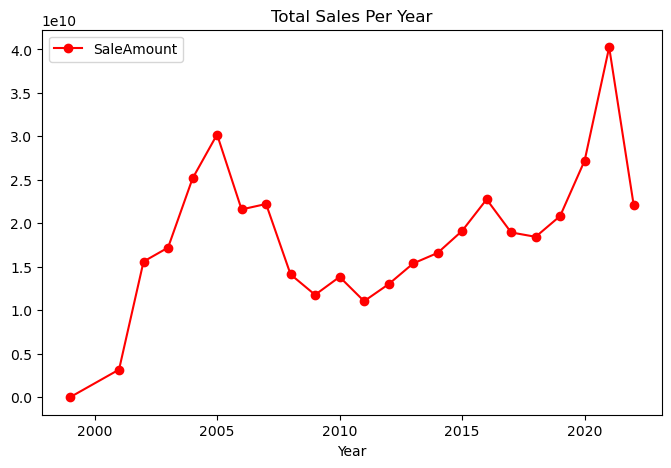

<Figure size 640x480 with 0 Axes>

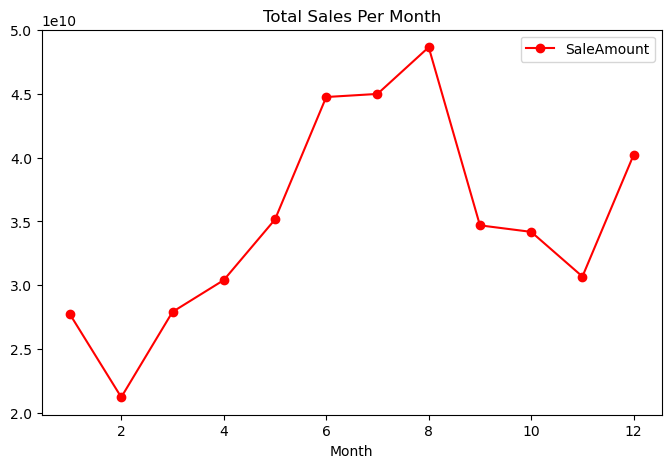

<Figure size 640x480 with 0 Axes>

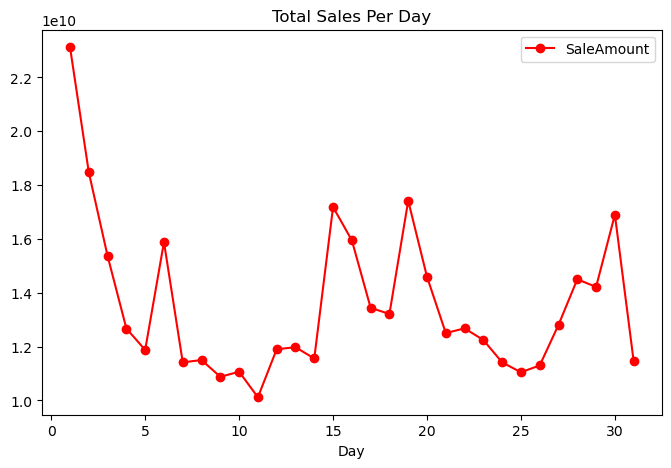

<Figure size 640x480 with 0 Axes>

In [13]:
axis = df.groupby('Year')[['SaleAmount']].sum().plot(figsize = (8,5), marker = 'o', color = 'r')
axis.set_title('Total Sales Per Year')
plt.figure()

axis = df.groupby('Month')[['SaleAmount']].sum().plot(figsize = (8,5), marker = 'o', color = 'r')
axis.set_title('Total Sales Per Month')
plt.figure()

axis = df.groupby('Day')[['SaleAmount']].sum().plot(figsize = (8,5), marker = 'o', color = 'r')
axis.set_title('Total Sales Per Day')
plt.figure()

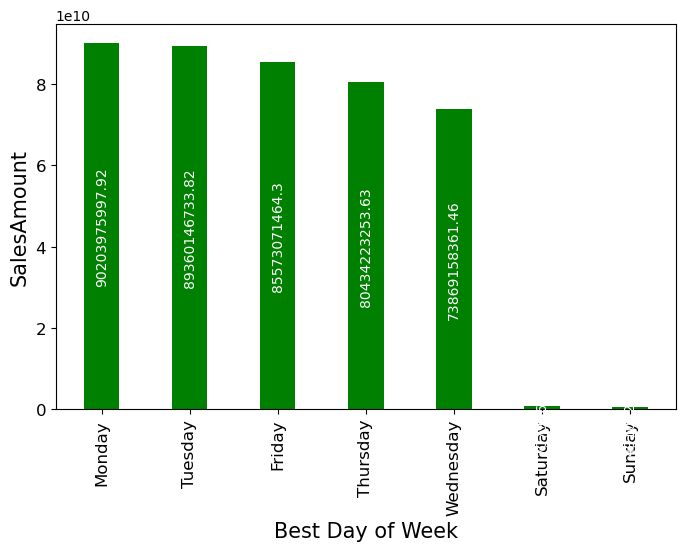

In [14]:
best_dayofweek = df.pivot_table(values = "SaleAmount" , index = "DayOfWeek" , aggfunc = "sum")
best_dayofweek = best_dayofweek.sort_values(by=['SaleAmount'], ascending=False).head(20)
best_dayofweek.reset_index(inplace=True) 
best_dayofweek['SaleAmount']=best_dayofweek['SaleAmount'].round(2)


fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(best_dayofweek['DayOfWeek'],best_dayofweek['SaleAmount'] , color ='green',
        width = 0.4)
 
plt.xlabel("Best Day of Week",fontsize=15)
plt.ylabel("SalesAmount",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_dayofweek['SaleAmount']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='white')
plt.show()

In [15]:
df.isnull().sum()

SerialNumber             0
ListYear                 0
DateRecorded             0
Town                     0
Address                 51
AssessedValue            0
SaleAmount               0
SalesRatio               0
PropertyType        382446
ResidentialType     393884
NonUseCode          751917
AssessorRemarks     892687
OPMremarks         1042595
Location            799516
Year                     0
Month                    0
Day                      0
DayOfWeek                0
dtype: int64

In [16]:
df.shape

(1054159, 18)

In [17]:
# Droping unecessary columns
cols = ['SerialNumber', 'ResidentialType', 'NonUseCode', 'AssessorRemarks', 'OPMremarks', 'Location','Address','ListYear','Town']
df.drop(cols, axis=1, inplace=True)

In [18]:
df.shape

(1054159, 11)

In [19]:
df["PropertyType"].unique()

array(['Commercial', 'Residential', 'Vacant Land', nan, 'Apartments',
       'Industrial', 'Public Utility', 'Condo', 'Two Family',
       'Three Family', 'Single Family', 'Four Family'], dtype=object)

In [20]:
df = df[df['PropertyType'].notna()]

In [21]:
df.shape

(671713, 11)

In [22]:
df.head()

,ListYear,DateRecorded,Town,AssessedValue,SaleAmount,SalesRatio,PropertyType,Year,Month,Day,DayOfWeek
0,2020,2021-09-13,Ansonia,150500.0,325000.0,0.4630,Commercial,2021,9,13,Monday
1,2020,2020-10-02,Ashford,253000.0,430000.0,0.5883,Residential,2020,10,2,Friday
2,2021,2022-07-05,Avon,329730.0,805000.0,0.4096,Residential,2022,7,5,Tuesday
3,2020,2021-03-09,Avon,130400.0,179900.0,0.7248,Residential,2021,3,9,Tuesday
4,2020,2021-04-13,Avon,619290.0,890000.0,0.6958,Residential,2021,4,13,Tuesday


In [23]:
df.tail()

,ListYear,DateRecorded,Town,AssessedValue,SaleAmount,SalesRatio,PropertyType,Year,Month,Day,DayOfWeek
1054153,2019,2020-08-03,Wilton,681870.0,1134708.0,0.600900,Single Family,2020,8,3,Monday
1054154,2019,2020-06-24,New London,60410.0,53100.0,1.137665,Single Family,2020,6,24,Wednesday
1054155,2019,2019-11-27,Waterbury,68280.0,76000.0,0.898400,Single Family,2019,11,27,Wednesday
1054156,2019,2020-04-27,Windsor Locks,121450.0,210000.0,0.578300,Single Family,2020,4,27,Monday
1054157,2019,2020-06-03,Middletown,203360.0,280000.0,0.726300,Single Family,2020,6,3,Wednesday


In [24]:
df.isnull().sum()

ListYear         0
DateRecorded     0
Town             0
AssessedValue    0
SaleAmount       0
SalesRatio       0
PropertyType     0
Year             0
Month            0
Day              0
DayOfWeek        0
dtype: int64

In [25]:
df["PropertyType"].unique()

array(['Commercial', 'Residential', 'Vacant Land', 'Apartments',
       'Industrial', 'Public Utility', 'Condo', 'Two Family',
       'Three Family', 'Single Family', 'Four Family'], dtype=object)

In [26]:
Commercial = df.loc[df['PropertyType'] == 'Commercial']

# This shows that we have time-series data of 4 years for Commercial sales.
print(Commercial['DateRecorded'].min())
print(Commercial['DateRecorded'].max())

2020-10-01 00:00:00
2022-09-30 00:00:00


In [27]:
Commercial = Commercial.groupby('DateRecorded')['SaleAmount'].sum().reset_index()

### Train Prophet Model

### Univariate Forecasting

#### Data Preparation

In [28]:
# Preparing the data
sales_Commercial_df = Commercial.rename(columns={'DateRecorded':'ds', 'SaleAmount':'y'})

In [29]:
m = Prophet()
m.fit(sales_Commercial_df)

15:58:47 - cmdstanpy - INFO - Chain [1] start processing
15:58:47 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [31]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-01,9.165390e+06,-1.563832e+07,4.401743e+07,9.165390e+06,9.165390e+06,4.844897e+06,4.844897e+06,4.844897e+06,4.844897e+06,4.844897e+06,4.844897e+06,0.0,0.0,0.0,1.401029e+07
1,2020-10-02,9.174761e+06,-2.007221e+07,4.181706e+07,9.174761e+06,9.174761e+06,1.994990e+06,1.994990e+06,1.994990e+06,1.994990e+06,1.994990e+06,1.994990e+06,0.0,0.0,0.0,1.116975e+07
2,2020-10-05,9.202874e+06,-1.102662e+07,4.854441e+07,9.202874e+06,9.202874e+06,1.001675e+07,1.001675e+07,1.001675e+07,1.001675e+07,1.001675e+07,1.001675e+07,0.0,0.0,0.0,1.921962e+07
3,2020-10-06,9.212244e+06,-2.317449e+07,4.005737e+07,9.212244e+06,9.212244e+06,2.036708e+06,2.036708e+06,2.036708e+06,2.036708e+06,2.036708e+06,2.036708e+06,0.0,0.0,0.0,1.124895e+07
4,2020-10-07,9.221615e+06,-2.244051e+07,3.962808e+07,9.221615e+06,9.221615e+06,8.415305e+05,8.415305e+05,8.415305e+05,8.415305e+05,8.415305e+05,8.415305e+05,0.0,0.0,0.0,1.006315e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,2023-09-26,4.430985e+06,-2.626166e+07,3.852406e+07,3.302647e+06,5.511802e+06,2.036708e+06,2.036708e+06,2.036708e+06,2.036708e+06,2.036708e+06,2.036708e+06,0.0,0.0,0.0,6.467693e+06
858,2023-09-27,4.418236e+06,-2.910078e+07,3.817445e+07,3.285980e+06,5.503259e+06,8.415305e+05,8.415305e+05,8.415305e+05,8.415305e+05,8.415305e+05,8.415305e+05,0.0,0.0,0.0,5.259767e+06
859,2023-09-28,4.405488e+06,-2.499339e+07,4.156400e+07,3.271560e+06,5.494710e+06,4.844897e+06,4.844897e+06,4.844897e+06,4.844897e+06,4.844897e+06,4.844897e+06,0.0,0.0,0.0,9.250385e+06
860,2023-09-29,4.392740e+06,-2.588734e+07,3.984256e+07,3.254918e+06,5.486832e+06,1.994990e+06,1.994990e+06,1.994990e+06,1.994990e+06,1.994990e+06,1.994990e+06,0.0,0.0,0.0,6.387730e+06


In [32]:
predicted_values = forecast['yhat_upper'][-365:]  

# Creating a dataframe with the predicted values and corresponding timestamps
predicted_df = pd.DataFrame({'Timestamp': future['ds'], 'Prediction': predicted_values})

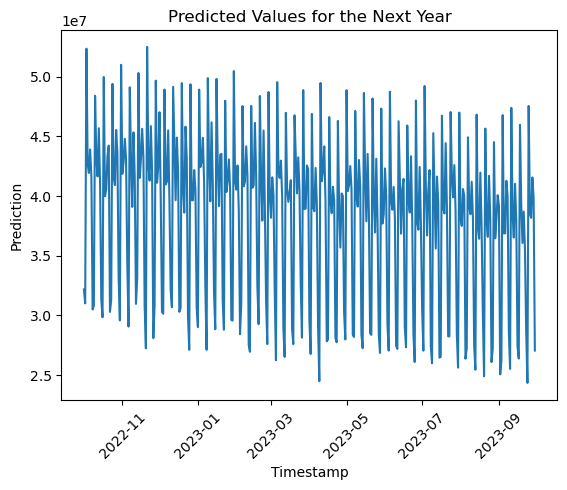

In [33]:
plt.plot(predicted_df['Timestamp'], predicted_df['Prediction'])


plt.xlabel('Timestamp')
plt.ylabel('Prediction')
plt.title('Predicted Values for the Next Year')


plt.xticks(rotation=45)

plt.show()

In [34]:
uni_data = pd.DataFrame(Commercial)

In [35]:
# Preparing the data
uni_data = uni_data.rename(columns={'DateRecorded':'ds', 'SaleAmount':'y'})

uni_data.head()

,ds,y
0,2020-10-01,27113000.0
1,2020-10-02,1678000.0
2,2020-10-05,7891000.0
3,2020-10-06,4062900.0
4,2020-10-07,24002500.0


In [36]:
uni_data.shape

(497, 2)

In [37]:
# Splitting the data into training and validation sets
split_date = '2021-12-31' 
train = uni_data[uni_data['ds'] < split_date]
test = uni_data[uni_data['ds'] >= split_date]

print(f"train shape : {train.shape} and test shape : {test.shape}")

train shape : (308, 2) and test shape : (189, 2)


### Model Training

In [38]:
# Training the model
uni_model = Prophet()
uni_model.fit(train)

15:59:23 - cmdstanpy - INFO - Chain [1] start processing
15:59:23 - cmdstanpy - INFO - Chain [1] done processing


### Inference

In [39]:
# Making predictions on the validation set
future_uni = uni_model.make_future_dataframe(periods=len(test))
forecast_uni = uni_model.predict(future_uni)

In [40]:
forecast_uni.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-01,1.189229e+07,-2.352758e+07,4.875000e+07,1.189229e+07,1.189229e+07,4.150559e+05,4.150559e+05,4.150559e+05,4.150559e+05,4.150559e+05,4.150559e+05,0.0,0.0,0.0,1.230735e+07
1,2020-10-02,1.191087e+07,-2.589868e+07,4.490432e+07,1.191087e+07,1.191087e+07,-2.839334e+06,-2.839334e+06,-2.839334e+06,-2.839334e+06,-2.839334e+06,-2.839334e+06,0.0,0.0,0.0,9.071535e+06
2,2020-10-05,1.196660e+07,-1.663357e+07,5.399601e+07,1.196660e+07,1.196660e+07,7.431628e+06,7.431628e+06,7.431628e+06,7.431628e+06,7.431628e+06,7.431628e+06,0.0,0.0,0.0,1.939823e+07
3,2020-10-06,1.198518e+07,-2.307354e+07,4.370585e+07,1.198518e+07,1.198518e+07,-1.904112e+06,-1.904112e+06,-1.904112e+06,-1.904112e+06,-1.904112e+06,-1.904112e+06,0.0,0.0,0.0,1.008107e+07
4,2020-10-07,1.200376e+07,-2.715608e+07,4.138694e+07,1.200376e+07,1.200376e+07,-5.455488e+06,-5.455488e+06,-5.455488e+06,-5.455488e+06,-5.455488e+06,-5.455488e+06,0.0,0.0,0.0,6.548272e+06


In [41]:
test.columns

Index(['ds', 'y'], dtype='object')

### Model Evaluation

In [42]:
y_pred_df_uni = forecast_uni[forecast_uni['ds'] >= split_date][['ds', 'yhat']]

result = pd.merge(test, y_pred_df_uni, how='inner')

result.shape

(128, 3)

In [43]:
result.head()

,ds,y,yhat
0,2022-01-03,71051232.0,2.785186e+07
1,2022-01-04,7684600.0,1.853470e+07
2,2022-01-05,7340943.0,1.500190e+07
3,2022-01-06,5242869.0,2.089103e+07
4,2022-01-07,13846000.0,1.765522e+07


In [44]:
#calculate rmse and mae
rmse = np.sqrt(np.mean((result['y']-result['yhat'])**2))
mae = (np.mean(np.abs(result['y']-result['yhat'])))

print(f"RMSE from Univariate Analysis is : {rmse}")
print(f"MAE from Univariate Analysis is : {mae}")

RMSE from Univariate Analysis is : 22833925.798119523
MAE from Univariate Analysis is : 17068477.802207492


Text(0, 0.5, 'Sales Amount')

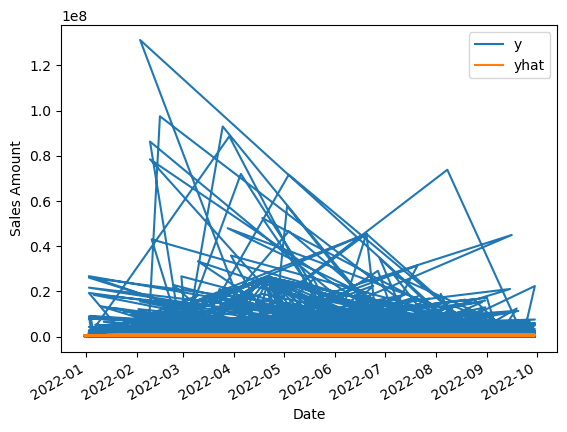

In [137]:
result.set_index('ds').plot()


In [46]:
#save the metrics values
perf_df = pd.DataFrame({"model": ["Univariate"], "RMSE": [rmse], "MAE": [mae]})
perf_df.head()

,model,RMSE,MAE
0,Univariate,2.283393e+07,1.706848e+07


In [47]:
m = Prophet()
m.fit(train)
df_cv = cross_validation(m, initial='365 days', period='30 days', horizon = '30 days')

15:59:52 - cmdstanpy - INFO - Chain [1] start processing
15:59:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

15:59:52 - cmdstanpy - INFO - Chain [1] start processing
15:59:52 - cmdstanpy - INFO - Chain [1] done processing
15:59:53 - cmdstanpy - INFO - Chain [1] start processing
15:59:53 - cmdstanpy - INFO - Chain [1] done processing
15:59:53 - cmdstanpy - INFO - Chain [1] start processing
15:59:53 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.227515e+16,1.107933e+08,5.806050e+07,0.644821,0.513484,0.788739,0.8
1,4 days,9.931972e+13,9.965928e+06,8.301407e+06,0.595417,0.513484,0.487848,1.0
2,5 days,8.365300e+14,2.892283e+07,1.865704e+07,1.733775,0.819729,0.857238,0.8
3,6 days,8.359481e+14,2.891277e+07,1.877378e+07,1.629647,0.491025,0.827366,0.8
4,7 days,4.885693e+14,2.210360e+07,1.522654e+07,2.271434,2.932854,0.962079,0.9
5,8 days,1.150106e+14,1.072430e+07,1.043417e+07,2.914625,2.932854,0.999082,1.0
6,9 days,9.824402e+13,9.911812e+06,9.056150e+06,2.716824,2.879329,0.915790,1.0
7,10 days,9.093139e+13,9.535795e+06,8.498267e+06,3.515685,2.879329,0.935680,1.0
8,11 days,1.565778e+14,1.251311e+07,1.061502e+07,2.926191,1.147946,0.885615,1.0
9,12 days,2.116709e+14,1.454891e+07,1.370203e+07,3.572530,1.147946,1.090175,1.0


In [49]:
df_cv['mape'] = (df_cv['y']-df_cv['yhat'])/(df_cv['y'])*100
df_cv['overestimate'] = df_cv['yhat'] > df_cv['y'] 

df_cv.sort_values('mape',ascending=False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,mape,overestimate
39,2021-12-02,1.285596e+07,-1.652172e+07,4.514865e+07,259386877.0,2021-11-30,95.043714,False
23,2021-11-05,1.368602e+07,-1.868406e+07,4.741634e+07,75919000.0,2021-10-31,81.972872,False
49,2021-12-16,1.293183e+07,-1.738900e+07,4.173748e+07,51485344.0,2021-11-30,74.882497,False
48,2021-12-15,1.154368e+07,-2.002686e+07,4.318569e+07,37322000.0,2021-11-30,69.070028,False
29,2021-11-16,1.603465e+07,-1.485621e+07,4.708570e+07,49188287.0,2021-10-31,67.401496,False
55,2021-12-27,2.406176e+07,-8.350539e+06,5.410976e+07,59149276.0,2021-11-30,59.320279,False
6,2021-10-13,1.224543e+07,-1.884671e+07,4.685466e+07,29024000.0,2021-10-01,57.809285,False
57,2021-12-29,1.161956e+07,-2.037691e+07,4.236381e+07,27133750.0,2021-11-30,57.176724,False
5,2021-10-12,1.668545e+07,-1.546342e+07,4.892522e+07,37487650.0,2021-10-01,55.490804,False
40,2021-12-03,1.425264e+07,-1.412275e+07,4.366999e+07,29295337.0,2021-11-30,51.348448,False


In [50]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,mape,overestimate
0,2021-10-04,2.691157e+07,-6.353259e+06,6.010066e+07,12239000.0,2021-10-01,-119.883771,True
1,2021-10-05,1.660958e+07,-1.571083e+07,4.974367e+07,12198835.0,2021-10-01,-36.157084,True
2,2021-10-06,1.216956e+07,-2.126304e+07,4.298622e+07,1715000.0,2021-10-01,-609.595303,True
3,2021-10-07,1.307557e+07,-2.083354e+07,4.400169e+07,25690000.0,2021-10-01,49.102492,False
4,2021-10-08,1.442837e+07,-1.889189e+07,4.573333e+07,2720000.0,2021-10-01,-430.454658,True
5,2021-10-12,1.668545e+07,-1.546342e+07,4.892522e+07,37487650.0,2021-10-01,55.490804,False
6,2021-10-13,1.224543e+07,-1.884671e+07,4.685466e+07,29024000.0,2021-10-01,57.809285,False
7,2021-10-14,1.315144e+07,-1.556571e+07,4.494702e+07,23955000.0,2021-10-01,45.099381,False
8,2021-10-15,1.450424e+07,-1.780285e+07,4.654355e+07,2594500.0,2021-10-01,-459.037976,True
9,2021-10-18,2.706332e+07,-4.439046e+06,5.799256e+07,7840037.0,2021-10-01,-245.193803,True


#### Lets hypertune this model!

In [51]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = [] 

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train)  # Fit model with given params
    df_cv = cross_validation(m, initial = '365 days', period = '30 days', horizon = 30, parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

16:00:12 - cmdstanpy - INFO - Chain [1] start processing
16:00:12 - cmdstanpy - INFO - Chain [1] done processing
16:00:15 - cmdstanpy - INFO - Chain [1] start processing
16:00:15 - cmdstanpy - INFO - Chain [1] done processing
16:00:17 - cmdstanpy - INFO - Chain [1] start processing
16:00:17 - cmdstanpy - INFO - Chain [1] done processing
16:00:20 - cmdstanpy - INFO - Chain [1] start processing
16:00:20 - cmdstanpy - INFO - Chain [1] done processing
16:00:23 - cmdstanpy - INFO - Chain [1] start processing
16:00:23 - cmdstanpy - INFO - Chain [1] done processing
16:00:25 - cmdstanpy - INFO - Chain [1] start processing
16:00:25 - cmdstanpy - INFO - Chain [1] done processing
16:00:28 - cmdstanpy - INFO - Chain [1] start processing
16:00:28 - cmdstanpy - INFO - Chain [1] done processing
16:00:30 - cmdstanpy - INFO - Chain [1] start processing
16:00:30 - cmdstanpy - INFO - Chain [1] done processing
16:00:33 - cmdstanpy - INFO - Chain [1] start processing
16:00:33 - cmdstanpy - INFO - Chain [1]

In [52]:
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale          rmse
0                     0.001                     0.01  8.568714e+06
1                     0.001                     0.10  6.266114e+06
2                     0.001                     1.00  6.347336e+06
3                     0.001                    10.00  6.683094e+06
4                     0.010                     0.01  7.776142e+06
5                     0.010                     0.10  6.904807e+06
6                     0.010                     1.00  7.233183e+06
7                     0.010                    10.00  7.526613e+06
8                     0.100                     0.01  6.748914e+06
9                     0.100                     0.10  6.555984e+06
10                    0.100                     1.00  6.585383e+06
11                    0.100                    10.00  6.599076e+06
12                    0.500                     0.01  4.471665e+06
13                    0.500                     0.10  4.704558

In [53]:
tuning_results.sort_values('rmse')

,changepoint_prior_scale,seasonality_prior_scale,rmse
14,0.500,1.00,4.467500e+06
12,0.500,0.01,4.471665e+06
15,0.500,10.00,4.533938e+06
13,0.500,0.10,4.704558e+06
1,0.001,0.10,6.266114e+06
2,0.001,1.00,6.347336e+06
9,0.100,0.10,6.555984e+06
10,0.100,1.00,6.585383e+06
11,0.100,10.00,6.599076e+06
3,0.001,10.00,6.683094e+06


In [54]:
tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0]

changepoint_prior_scale    5.000000e-01
seasonality_prior_scale    1.000000e+00
rmse                       4.467500e+06
Name: 0, dtype: float64

In [55]:
dict(tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0])

{'changepoint_prior_scale': 0.5,
 'seasonality_prior_scale': 1.0,
 'rmse': 4467499.51714303}

In [56]:
params_dictionary = dict(tuning_results.sort_values('rmse').reset_index(drop=True).drop('rmse',axis='columns').iloc[0])

m = Prophet(changepoint_prior_scale = params_dictionary['changepoint_prior_scale'], 
            seasonality_prior_scale = params_dictionary['seasonality_prior_scale'])

In [57]:
prediction_days = 365
forecast_start_dt = date(2021,1,1) #data set ends of (2017,8,15)
forecast_start_date = (forecast_start_dt).strftime("%Y-%m-%d") 
print(forecast_start_date)

2021-01-01


In [58]:
def mape(actual, pred): 
    '''
    Mean Absolute Percentage Error (MAPE) Function
    
    input: list/series for actual values and predicted values
    output: mape value 
    '''
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [59]:
m.fit(train)
future = m.make_future_dataframe(periods=prediction_days)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

df_copy = uni_data.copy()
df_copy.columns = ['ds', 'ytrue']
predicted_df = predicted_df.merge(df_copy)
mape(predicted_df['ytrue'], predicted_df['yhat'])

16:00:54 - cmdstanpy - INFO - Chain [1] start processing
16:00:54 - cmdstanpy - INFO - Chain [1] done processing


1086.1644167966763

### Multivariate

In [60]:
df.head()

,ListYear,DateRecorded,Town,AssessedValue,SaleAmount,SalesRatio,PropertyType,Year,Month,Day,DayOfWeek
0,2020,2021-09-13,Ansonia,150500.0,325000.0,0.4630,Commercial,2021,9,13,Monday
1,2020,2020-10-02,Ashford,253000.0,430000.0,0.5883,Residential,2020,10,2,Friday
2,2021,2022-07-05,Avon,329730.0,805000.0,0.4096,Residential,2022,7,5,Tuesday
3,2020,2021-03-09,Avon,130400.0,179900.0,0.7248,Residential,2021,3,9,Tuesday
4,2020,2021-04-13,Avon,619290.0,890000.0,0.6958,Residential,2021,4,13,Tuesday


In [61]:
df["ListYear"].unique()

array([2020, 2021, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019], dtype=int64)

### Data preparation

In [ ]:
#adding holiday data

holiday = pd.DataFrame([])

uk_holidays = holidays.GB()  # this is a dict
# the below is the same, but takes a string:
uk_holidays = holidays.country_holidays('GB')  # this is a dict


for date_, name in sorted(holidays.GB(years=[2020, 2021, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019]).items()):
    holiday = pd.concat([holiday, pd.DataFrame({ 'holiday': "UK-Holidays"}, index=[0])], ignore_index=True) 

#holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
holiday.head()

In [ ]:
multi = pd.concat([df, holiday], axis=1, join="inner")

In [ ]:
multi.head()

In [75]:
# Droping unecessary columns
cols = ['ListYear']
df.drop(cols, axis=1, inplace=True)

In [76]:
df.head()

,DateRecorded,SaleAmount,SalesRatio,PropertyType,Year,Month,Day,DayOfWeek
0,2021-09-13,325000.0,0.4630,Commercial,2021,9,13,Monday
1,2020-10-02,430000.0,0.5883,Residential,2020,10,2,Friday
2,2022-07-05,805000.0,0.4096,Residential,2022,7,5,Tuesday
3,2021-03-09,179900.0,0.7248,Residential,2021,3,9,Tuesday
4,2021-04-13,890000.0,0.6958,Residential,2021,4,13,Tuesday


In [82]:
# Preparing the data for multivariate time series analysis
# Convert 'weekday' and 'holiday_name' to categorical variables using get dummies
df = df.reset_index()
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'])
weekday_dummies = pd.get_dummies(df['DayOfWeek'], prefix='DayOfWeek')
#holiday_name_dummies = pd.get_dummies(df['holiday_name'], prefix='holiday_name')

multi_data = multi_data = pd.concat([df[['DateRecorded', 'SaleAmount']], weekday_dummies], axis=1)
multi_data = multi_data.rename(columns={'DateRecorded': 'ds', 'SaleAmount': 'y'})

multi_data.head()

,ds,y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2021-09-13,325000.0,False,True,False,False,False,False,False
1,2020-10-02,430000.0,True,False,False,False,False,False,False
2,2022-07-05,805000.0,False,False,False,False,False,True,False
3,2021-03-09,179900.0,False,False,False,False,False,True,False
4,2021-04-13,890000.0,False,False,False,False,False,True,False


### Train/Validation Split

In [83]:
# Splitting the data into training and validation sets
split_date = '2021-12-31' 
train = multi_data[multi_data['ds'] < split_date]
test = multi_data[multi_data['ds'] >= split_date]

In [84]:
multi_data.columns

Index(['ds', 'y', 'DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday',
       'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday',
       'DayOfWeek_Wednesday'],
      dtype='object')

In [85]:
# Initializing the Prophet model for multivariate analysis
multi_model = Prophet()

# Adding the additional regressors
for column in multi_data.columns[2:]:
    print(column)
    multi_model.add_regressor(column)

DayOfWeek_Friday
DayOfWeek_Monday
DayOfWeek_Saturday
DayOfWeek_Sunday
DayOfWeek_Thursday
DayOfWeek_Tuesday
DayOfWeek_Wednesday


In [86]:
# Fit the model
multi_model.fit(train)

16:17:57 - cmdstanpy - INFO - Chain [1] start processing
16:18:27 - cmdstanpy - INFO - Chain [1] done processing


In [87]:
train.head()

,ds,y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2021-09-13,325000.0,False,True,False,False,False,False,False
1,2020-10-02,430000.0,True,False,False,False,False,False,False
3,2021-03-09,179900.0,False,False,False,False,False,True,False
4,2021-04-13,890000.0,False,False,False,False,False,True,False
5,2021-07-02,1447500.0,True,False,False,False,False,False,False


In [88]:
test.head()

,ds,y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
2,2022-07-05,805000.0,False,False,False,False,False,True,False
10,2022-04-29,561850.0,True,False,False,False,False,False,False
17,2022-01-14,315000.0,True,False,False,False,False,False,False
21,2022-06-21,247000.0,False,False,False,False,False,True,False
24,2022-08-02,500000.0,False,False,False,False,False,True,False


In [89]:
multi_data.head()

,ds,y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2021-09-13,325000.0,False,True,False,False,False,False,False
1,2020-10-02,430000.0,True,False,False,False,False,False,False
2,2022-07-05,805000.0,False,False,False,False,False,True,False
3,2021-03-09,179900.0,False,False,False,False,False,True,False
4,2021-04-13,890000.0,False,False,False,False,False,True,False


In [91]:
multi_data.isna().sum()

ds                     0
y                      0
DayOfWeek_Friday       0
DayOfWeek_Monday       0
DayOfWeek_Saturday     0
DayOfWeek_Sunday       0
DayOfWeek_Thursday     0
DayOfWeek_Tuesday      0
DayOfWeek_Wednesday    0
dtype: int64

In [122]:
# Making predictions on the validation set
future_multi = multi_model.make_future_dataframe(periods=len(test))

In [123]:

#add all the additional columns to future_multi
future_multi = pd.merge(future_multi, multi_data.drop("y", axis=1),how='left', on='ds')

In [124]:
future_multi.isna().sum()

ds                         0
DayOfWeek_Friday       40733
DayOfWeek_Monday       40733
DayOfWeek_Saturday     40733
DayOfWeek_Sunday       40733
DayOfWeek_Thursday     40733
DayOfWeek_Tuesday      40733
DayOfWeek_Wednesday    40733
dtype: int64

In [125]:
future_multi.shape

(712446, 8)

In [126]:
future_multi=future_multi.dropna()

In [127]:
future_multi.shape

(671713, 8)

In [128]:
future_multi.isna().sum()

ds                     0
DayOfWeek_Friday       0
DayOfWeek_Monday       0
DayOfWeek_Saturday     0
DayOfWeek_Sunday       0
DayOfWeek_Thursday     0
DayOfWeek_Tuesday      0
DayOfWeek_Wednesday    0
dtype: int64

In [129]:

forecast_multi = multi_model.predict(future_multi)

forecast_multi.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,DayOfWeek_Friday,DayOfWeek_Friday_lower,DayOfWeek_Friday_upper,DayOfWeek_Monday,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1999-04-05,398966.000000,-8.175441e+06,8.854054e+06,398966.000000,398966.000000,0.0,0.0,0.0,37793.95,...,-19704.095660,-19704.095660,-19704.095660,-19425.708695,-19425.708695,-19425.708695,0.0,0.0,0.0,397630.145645
1,2001-08-01,390783.858338,-7.574295e+06,9.062418e+06,390783.858338,390783.858338,0.0,0.0,0.0,0.00,...,-15769.235522,-15769.235522,-15769.235522,12155.229195,12155.229195,12155.229195,0.0,0.0,0.0,426088.052012
2,2001-08-23,390571.835822,-7.221029e+06,9.250934e+06,390571.835822,390571.835822,0.0,0.0,0.0,0.00,...,21803.000000,21803.000000,21803.000000,144765.141986,144765.141986,144765.141986,0.0,0.0,0.0,606793.077808
3,2001-09-04,390456.187176,-8.090529e+06,8.106187e+06,390456.187176,390456.187176,0.0,0.0,0.0,0.00,...,1775.015386,1775.015386,1775.015386,-20888.427804,-20888.427804,-20888.427804,0.0,0.0,0.0,415273.624758
4,2001-09-05,390446.549789,-7.974290e+06,8.949189e+06,390446.549789,390446.549789,0.0,0.0,0.0,0.00,...,-15769.235522,-15769.235522,-15769.235522,-32853.461907,-32853.461907,-32853.461907,0.0,0.0,0.0,380742.052360
